#PREDICTING HEART DISEASE USING MACHINE LEARNING

This notebook looks into various python based machine learning and data science libraries
in attempt to build  a machine learning model capable of predicting weather or not someone has heart disease based on their medical attributes


We are going to take following approach:
    1.Problem definition
    
    2.Data
    
    3.Evaluation
    
    4.Features
    
    5.Modelling
    
    6.Experimentation
    

PREPARING THE TOOLS

In [150]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

%matplotlib inline 

#IMPORTING MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#MODEL EVALUATION
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import RocCurveDisplay,auc,roc_curve



LOADING DATA

In [109]:
df=pd.read_csv("heart_disease.csv") 
df.shape



(303, 14)

  EXPLORING THE DATA

EXPLORATORY DATA ANALYSIS (EDA)
The goal here is to find more about the data and become a subject matter export on the dataset you are working with

In [110]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [111]:
#lets find out how many of each class  are there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

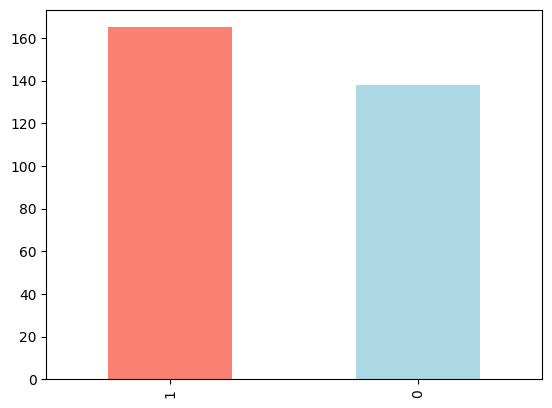

In [112]:
#plotting the data counts
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

#checking the information about the data set
df.info()

HEART DISEASE FREQUENCY ACCORDING TO THE SEX

In [113]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [114]:
#comparing target column with sex column 
#0-FEMALE
#1-MALE 

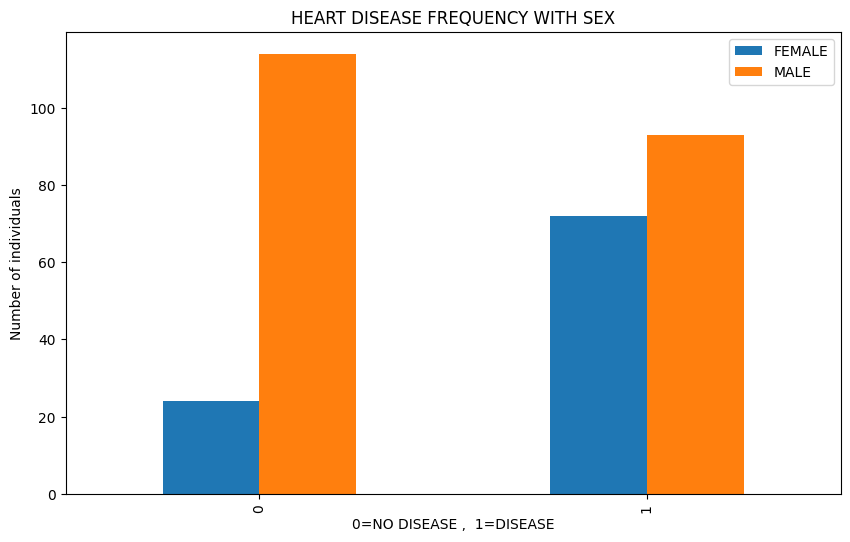

In [115]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6) )
plt.title("HEART DISEASE FREQUENCY WITH SEX")
plt.xlabel("0=NO DISEASE ,  1=DISEASE")
plt.ylabel("Number of individuals")
plt.legend(["FEMALE","MALE"]);


AGE VS MAX HEART RATE FOR HEART DISEASE



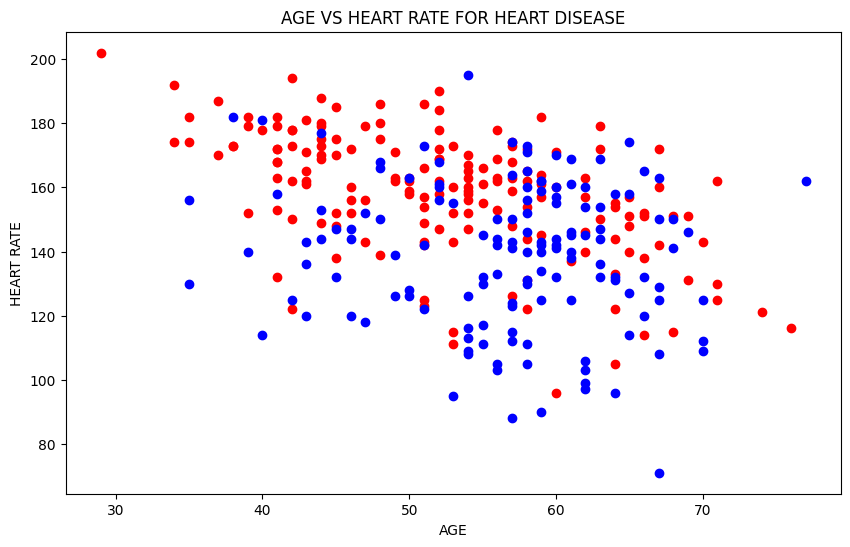

In [116]:
fig,ax=plt.subplots(figsize=(10,6))
ax=plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red")
ax=plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="blue")
ax=plt.title("AGE VS HEART RATE FOR HEART DISEASE")
ax=plt.xlabel("AGE")
ax=plt.ylabel("HEART RATE")
#ax=plt.legend("SUFFERING","NOT SUFFREING")

HEART DISEASE FREQUECY PER CHEST PAIN TYPE

*0-TYPICAL ANGINA

*1-ATYPICAL ANGINA

*2-NON-ANGINAL PAIN

*3-ASYMTOMATIC

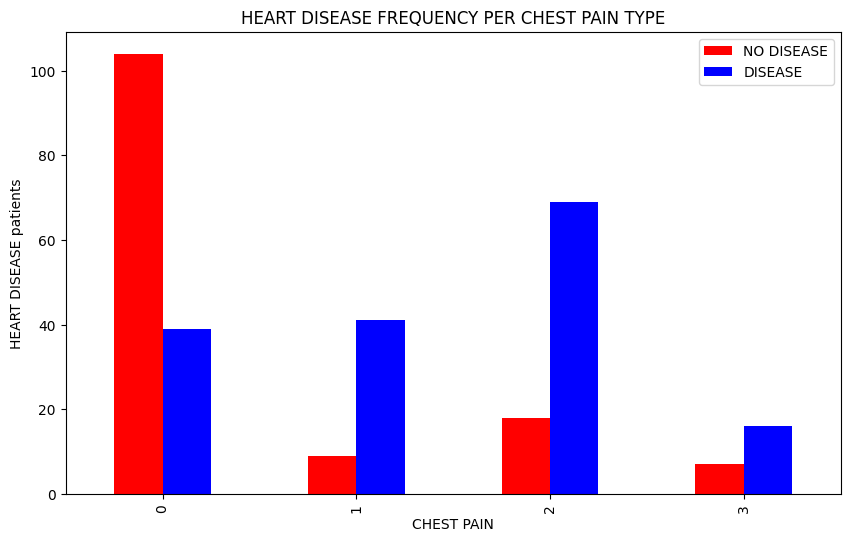

In [117]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["red","blue"])
plt.title("HEART DISEASE FREQUENCY PER CHEST PAIN TYPE")
plt.xlabel("CHEST PAIN")
plt.ylabel("HEART DISEASE patients")
plt.legend(["NO DISEASE","DISEASE"])


MAKING OUR CORELATION MATRIX

In [118]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


MODELLING OUR MACHINE LEARNING MODEL

In [119]:
#split data into X and Y
X=df.drop("target",axis='columns')
Y=df["target"]

In [120]:
#Splitting data into train and test sets
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2 )
len(X_train),len(X_test)

(242, 61)

WE ARE GOING TO TRY THREE DIFFERENT MACHINE LEARNING MODELS

1-LOGISTIC REGRESSION

2-K-NEAREST NEIGHBOURS CLASSIFIER

3-RANDOM FOREST CLASSIFIER

In [121]:
 #Put models in a dictionary
models={"Logistic Regression":LogisticRegression(),"KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

#creating function to fit and score our model
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    """FITS AND EVALUATES THE MACHINE LEARNING MODEL"""
    np.random.seed(42)
    #Make dictonary to keep model scores
    model_scores={}
    #loop through models
    for name,model in models.items():
        #Fit the model to the data
        model.fit(X_train,Y_train)
        
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores


In [122]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,Y_train=Y_train,Y_test=Y_test)

C:\Users\DEEPANSHU TEWARI\OneDrive\Desktop\Sample_project1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

MODEL COMPARISION

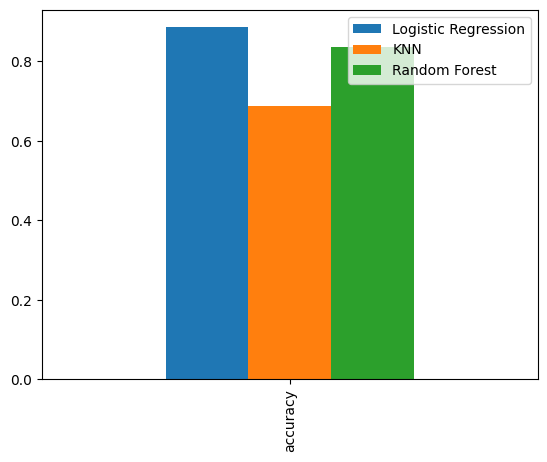

In [124]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.plot.bar();

Evaluating and improving our model

*HyperParameter TUning

*Features importance

*Confusion matrix

*Cross validation

*Precision

*Recall

*F1 score

*Classification report

*ROC CURVE

*Area Under The Curve(AUC)

HYPERPARAMETER TUNING

In [125]:
 #tuning KNN 
train_scores=[]
test_scores=[]


neighbors= range(1,21)

for i in neighbors:
    Knn=KNeighborsClassifier()
    Knn.set_params(n_neighbors=i)
    
    
    Knn.fit(X_train,Y_train)
    
    train_scores.append(Knn.score(X_train,Y_train))
    test_scores.append(Knn.score(X_test,Y_test))
    

In [126]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [127]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

THE MAXIMUM KNN SCORE ON THE TEST DATA::75.41


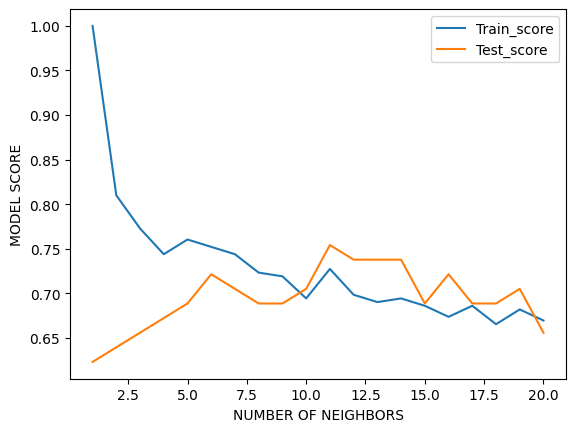

In [128]:
plt.plot(neighbors,train_scores,label="Train_score")
plt.plot(neighbors,test_scores,label="Test_score")
plt.xlabel("NUMBER OF NEIGHBORS")
plt.ylabel("MODEL SCORE")
plt.legend()


print(f"THE MAXIMUM KNN SCORE ON THE TEST DATA::{max(test_scores)*100:.2f}")

#HYPER PARAMETER TUNING WITH RANDOMIZEDSEARCHCV

*LOGISTIC REGRESSION
*RANDOM FOREST CLASSIFIER


In [129]:
#creating grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}
#creating grid for randomforest classifier

rf_grid={"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}


NOW WE HAVE GOT HYPERPARAMETER GRIDS SET UP FOR EACH OF OUR MODELS,NOW TUNING THEM USING RANDOMIZE SEARCH CV

In [130]:
#for logistic regression
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [131]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [132]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

In [133]:
np.random.seed(42)
rs_RF=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rs_RF.fit(X_train,Y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [96]:
rs_RF.best_params_
   

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [97]:
rs_RF.score(X_test,Y_test)

0.8688524590163934

HYPER PARAMETER TUNING USING GRID SEARCH CV

In [98]:
log_reg_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

gs_log_reg.fit(X_train,Y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [99]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [100]:
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

EVALUATING OUR TUNED MACHINE LEARNING CLASSIFIER,BEYOND ACCURACY

In [33]:
y_preds=gs_log_reg.predict(X_test)
y_preds  

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [34]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

CONFUSION MATRIX

In [35]:
print(confusion_matrix(Y_test,y_preds))

[[25  4]
 [ 3 29]]


CLASSIFICATION REPORT

In [36]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [37]:
precision_score(Y_test,y_preds)

0.8787878787878788

In [38]:
recall_score(Y_test,y_preds)

0.90625

In [39]:
f1_score(Y_test,y_preds)

0.8923076923076922

In [40]:
accuracy_score(Y_test,y_preds)

0.8852459016393442

CALCULATING EVALUATION MATRIX USING CROSS VAL SCORE

In [41]:
gs_log_reg.best_params_
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")

cv_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [42]:
cv_precision=cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [45]:
cv_recall=cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [43]:
cv_f1=cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

In [46]:
#visualizing the crossvalidated matrix
cv_metrics=pd.DataFrame({"ACCURACY":cv_acc,
                         "PRECISION":cv_precision,
                         "RECALL":cv_recall,
                         "f1":cv_f1},
                         index=[0])

CROSS VALIDATED CLASSIFICATION MATRIX

In [134]:
cv_metrics

,ACCURACY,PRECISION,RECALL,f1
0,0.844699,0.820794,0.921212,0.867301


<Axes: title={'center': 'CROSS VALIDATED CLASSIFICATION MATRIX'}>

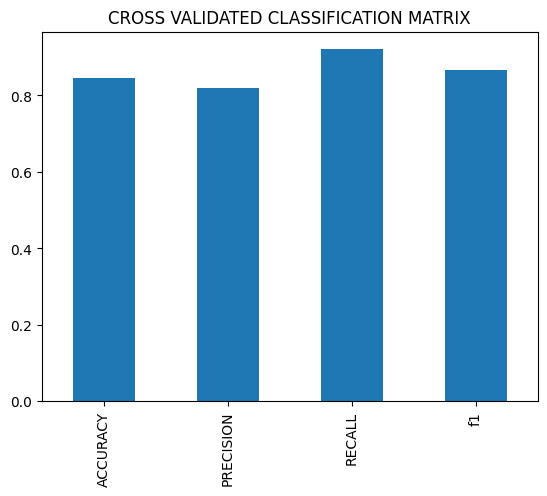

In [135]:
 cv_metrics.T.plot.bar(title="CROSS VALIDATED CLASSIFICATION MATRIX",legend=False)

FEATURE IMPORTANCE

In [136]:
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")
clf.fit(X_train,Y_train)
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [140]:
#MATCH COEFS OF FEATURES TO  COLUMNS
features_dict = dict(zip (df.columns , list(clf.coef_[0])))
features_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

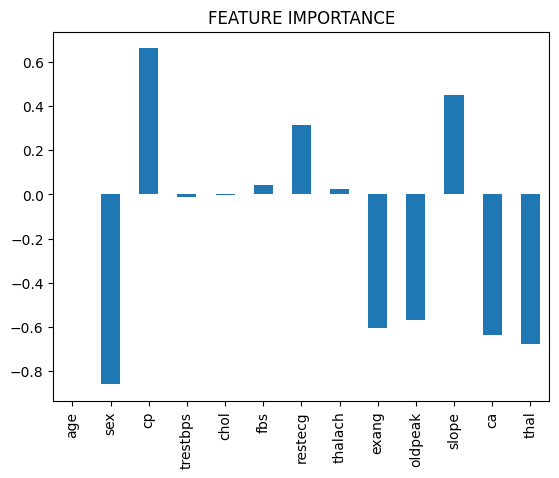

In [144]:
#VISUALISING FEATURE IMPORTANCE
feature_df=pd.DataFrame(features_dict,index=[0])
feature_df.T.plot.bar(title="FEATURE IMPORTANCE",legend=False);

In [148]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [146]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [145]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


            slope-the slope of the peak exercise ST segment
          *0:Unsloping:better heart rate with exercise(uncommon)
          *1:flatsloping:minimal change
          *2:Downsloping:signs the unhealthy rate     

In [152]:
#SAVING OUR MODEL
pickle.dump(clf,open('HEART_DISEASE_MODEL.pkl','wb'))